In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(u'E:\\IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.shape

(50000, 2)

In [8]:
#Checking if there is any blank/empty strings

blanks = []  # start with an empty list

for i,review,label in df.itertuples():  
    if type(review)==str:            
        if review.isspace():         
            blanks.append(i)     

print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [9]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
len(X_train)

35000

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.feature_extraction import text
len(text.ENGLISH_STOP_WORDS)

318

In [13]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [14]:

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LinearSVC()),
])

#logistic regression
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LogisticRegression()),
])
#random forest
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', RandomForestClassifier()),
])

# First Pipeline

In [15]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...])),
                ('clf', MultinomialNB())])

In [16]:
predictions = text_clf_nb.predict(X_test)

In [17]:
from sklearn import metrics
cm=(metrics.confusion_matrix(y_test,predictions))
print(cm)

[[6655  885]
 [1126 6334]]


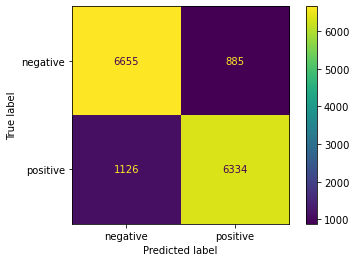

In [18]:
disp=(metrics.ConfusionMatrixDisplay(cm,display_labels=text_clf_nb.classes_))
disp.plot()

In [19]:
# classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      7540
    positive       0.88      0.85      0.86      7460

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [20]:
# overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8659333333333333


# Second Pipeline

In [21]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...])),
                ('clf', LinearSVC())])

In [22]:
predictions = text_clf_lsvc.predict(X_test)

In [23]:
cm=(metrics.confusion_matrix(y_test,predictions))
print(cm)

[[6666  874]
 [ 728 6732]]


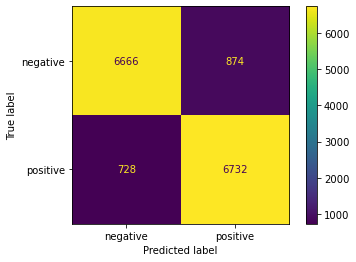

In [24]:
disp=(metrics.ConfusionMatrixDisplay(cm,display_labels=text_clf_nb.classes_))
disp.plot()

In [25]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7540
    positive       0.89      0.90      0.89      7460

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [26]:
print(metrics.accuracy_score(y_test,predictions))

0.8932


# Third Pipeline

In [27]:
text_clf_lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...])),
                ('clf', LogisticRegression())])

In [28]:
predictions = text_clf_lr.predict(X_test)

In [29]:
cm=(metrics.confusion_matrix(y_test,predictions))
print(cm)

[[6642  898]
 [ 713 6747]]


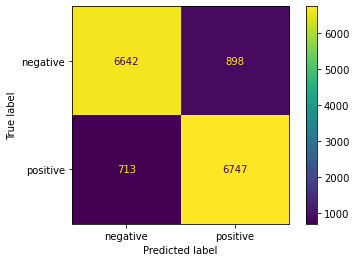

In [30]:
disp=(metrics.ConfusionMatrixDisplay(cm,display_labels=text_clf_nb.classes_))
disp.plot()

In [31]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7540
    positive       0.88      0.90      0.89      7460

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [32]:
print(metrics.accuracy_score(y_test,predictions))

0.8926


# Fourth Pipeline

In [33]:
text_clf_rf.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...])),
                ('clf', RandomForestClassifier())])

In [34]:
predictions = text_clf_rf.predict(X_test)

In [35]:
cm=(metrics.confusion_matrix(y_test,predictions))
print(cm)

[[6489 1051]
 [1141 6319]]


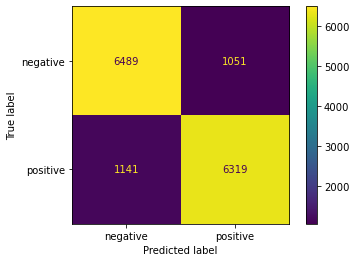

In [36]:
disp=(metrics.ConfusionMatrixDisplay(cm,display_labels=text_clf_nb.classes_))
disp.plot()

In [37]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      7540
    positive       0.86      0.85      0.85      7460

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



In [38]:
print(metrics.accuracy_score(y_test,predictions))

0.8538666666666667


In [46]:
myreview = "A movie I really wanted to love was terrible. \
I'm sure the producers had the best intentions, but the execution was lacking."

In [47]:
print(text_clf_lsvc.predict([myreview]))

['negative']


In [48]:
import pickle

In [50]:
filename='trained_model.sav'
pickle.dump(text_clf_lsvc,open(filename,'wb'))

In [51]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [52]:
print(loaded_model.predict([myreview]))

['negative']
